In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics


sns.set(style="darkgrid")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
my_path = "drive/My Drive/datacamp/"

In [4]:
df = pd.read_csv( my_path + 'sample_submission.csv',header=None)


print("shape", df.shape)
df.head(5)

shape (506692, 2)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1
0,TransactionID,isFraud
1,3663549,0.5
2,3663550,0.5
3,3663551,0.5
4,3663552,0.5


In [0]:
del df

# Import des données

In [0]:
test_id = pd.read_csv(my_path + "test_identity.csv")
test_tran = pd.read_csv(my_path + "test_transaction.csv")
train_id = pd.read_csv(my_path + "train_identity.csv")
train_tran = pd.read_csv(my_path + "train_transaction.csv")


In [0]:
train_tran.head(5)

In [0]:
train_id.head(5)

On rassemble les données train et test via la variable TransactionID.

In [0]:
train = pd.merge(train_tran, train_id, on='TransactionID', how='left')
test = pd.merge(test_tran, test_id, on='TransactionID', how='left')

In [10]:
print(f'Train dataset: {train.shape[0]} lignes & {train.shape[1]} colonnes')
print(f'Test dataset: {test.shape[0]} lignes & {test.shape[1]} colonnes')

Train dataset: 590540 rows & 434 columns
Test dataset: 506691 rows & 433 columns


In [0]:
del train_id, train_tran, test_id, test_tran

In [12]:
test.columns[370:433]

Index(['V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334',
       'V335', 'V336', 'V337', 'V338', 'V339', 'id-01', 'id-02', 'id-03',
       'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11',
       'id-12', 'id-13', 'id-14', 'id-15', 'id-16', 'id-17', 'id-18', 'id-19',
       'id-20', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27',
       'id-28', 'id-29', 'id-30', 'id-31', 'id-32', 'id-33', 'id-34', 'id-35',
       'id-36', 'id-37', 'id-38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [0]:
old_names = ['id-01', 'id-02', 'id-03',
       'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11',
       'id-12', 'id-13', 'id-14', 'id-15', 'id-16', 'id-17', 'id-18', 'id-19',
       'id-20', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27',
       'id-28', 'id-29', 'id-30', 'id-31', 'id-32', 'id-33', 'id-34', 'id-35',
       'id-36', 'id-37', 'id-38'] 
new_names = ['id_01', 'id_02', 'id_03',
       'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11',
       'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
       'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27',
       'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38']
test.rename(columns=dict(zip(old_names, new_names)), inplace=True)

# Valeurs manquantes

In [17]:
data_null = train.isnull().sum()/len(train) * 100
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)[:500]
missing_data = pd.DataFrame({'Missing Ratio': data_null})
missing_data.head()

,Missing Ratio
id_24,99.196159
id_25,99.130965
id_07,99.127070
id_08,99.127070
id_21,99.126393


In [18]:
missing_data.shape

(414, 1)

Il y a 414 variables qui contiennent des valeurs manquantes.

On supprime les variables qui contiennent plus de 80% de valeurs manquantes.

In [0]:
def cols_null(data):
    null_cols = [col for col in data.columns if data[col].isnull().sum() / data.shape[0] > 0.8] 
    print("More than 80% null: " + str(len(null_cols)))
    return null_cols

In [8]:
null_cols = cols_null(train)
train.drop(null_cols,1,inplace=True)

More than 80% null: 74


In [21]:
print(null_cols)

['dist2', 'D7', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [0]:
test.drop(null_cols,1,inplace=True)

In [12]:
print(f'Train dataset: {train.shape[0]} lignes & {train.shape[1]} colonnes')
print(f'Test dataset: {test.shape[0]} lignes & {test.shape[1]} colonnes')

Train dataset: 590540 lignes & 360 colonnes
Test dataset: 506691 lignes & 359 colonnes


# Variables


## Variables discrètes :

 - ProductCD
 - emaildomain
 - card1 - card6
 - addr1, addr2
 - P_emaildomain
 - R_emaildomain
 - M1 - M9
 - DeviceType
 - DeviceInfo
 - id_12 - id_38

## Target : isFraud

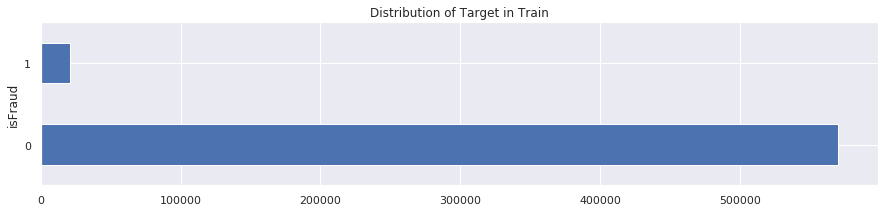

In [24]:
train.groupby('isFraud') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribution of Target in Train',
          figsize=(15, 3))
plt.show()

## Transaction Amt

Le montant de la transaction.

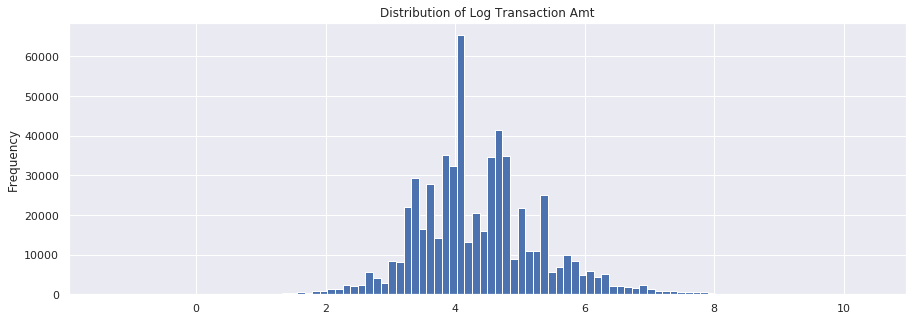

In [26]:
train['TransactionAmt'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribution of Log Transaction Amt')
plt.show()

In [0]:
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

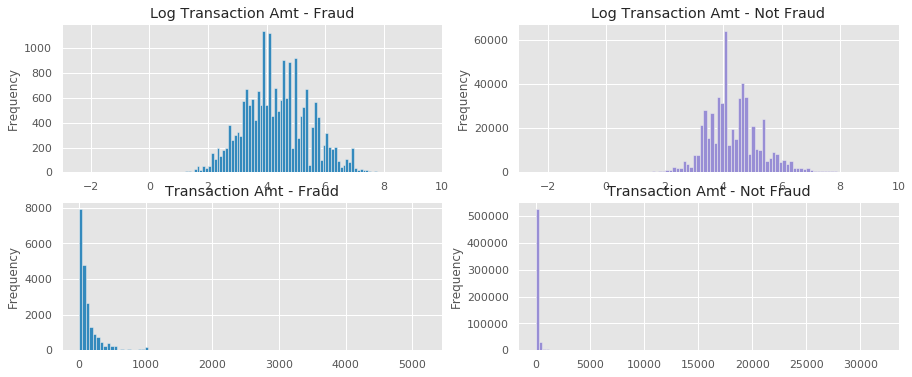

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
train.loc[train['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color=color_pal[1],
          xlim=(-3, 10),
         ax= ax1)
train.loc[train['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color=color_pal[2],
          xlim=(-3, 10),
         ax=ax2)
train.loc[train['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color=color_pal[1],
         ax= ax3)
train.loc[train['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color=color_pal[2],
         ax=ax4)
plt.show()


On observe que la moyenne du montant des transactions est plus élevée dans le groupe des fraudes.

In [29]:
print('Mean transaction amt for fraud is {:.4f}'.format(train.loc[train['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(train.loc[train['isFraud'] == 0]['TransactionAmt'].mean()))

Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


## ProductCD

Le produit pour chaque transaction.

In [0]:
train.groupby('ProductCD') \
    ['TransactionID'].count() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Count of Observations by ProductCD')
plt.show()

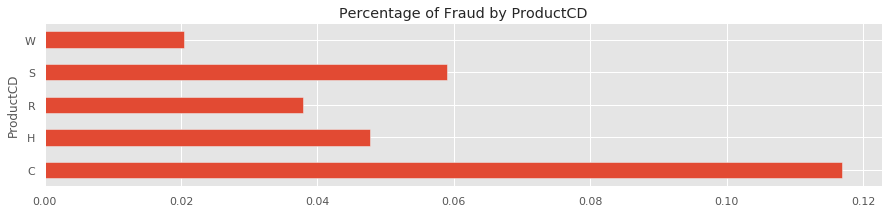

In [31]:
train.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD')
plt.show()

On observe que :
 - W a le plus grand nombre d'observations, C a le moins.
 - C a le plus grand pourcentage de fraude >11%
 - W a le moins avec ~2%

## card1 - card6

Informations sur les cartes de paiement.

In [32]:
card_cols = [c for c in train.columns if 'card' in c]
train[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


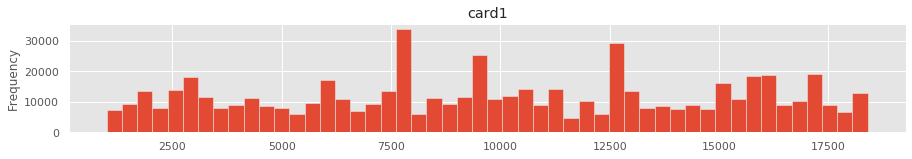

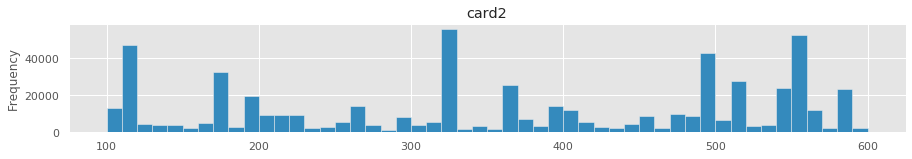

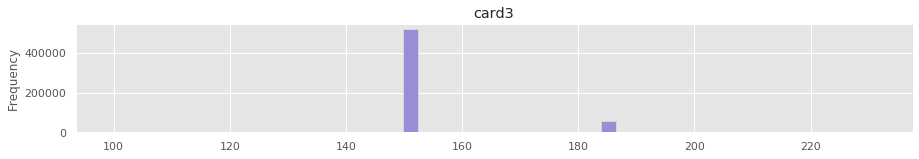

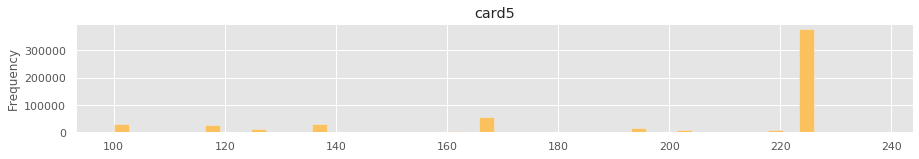

In [33]:
color_idx = 0
for c in card_cols:
    if train[c].dtype in ['float64','int64']:
        train[c].plot(kind='hist',
                                      title=c,
                                      bins=50,
                                      figsize=(15, 2),
                                      color=color_pal[color_idx])
    color_idx += 1
    plt.show()

In [0]:
train_fr = train.loc[train['isFraud'] == 1]
train_nofr = train.loc[train['isFraud'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_fr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='Count of card4 fraud')
train_nofr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='Count of card4 non-fraud')
train_fr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='Count of card6 fraud')
train_nofr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='Count of card6 non-fraud')
plt.show()

## DeviceType

In [0]:
train.groupby('DeviceType') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Percentage of Fraud by Device Type')
plt.show()

## DeviceInfo

In [0]:
train_identity_.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Train')
plt.show()

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp). One early discovery about the data is that the train and test appear to be split by time. There is a slight gap inbetween, but otherwise the training set is from an earlier period of time and test is from a later period of time. This will impact which cross validation techniques should be used.

We will look into this more when reviewing differences in distribution of features between train and test.

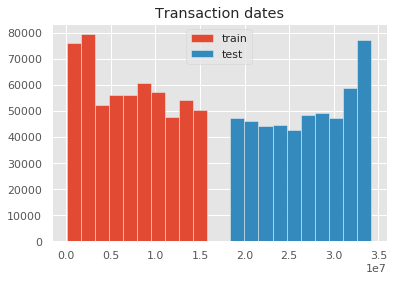

In [38]:
plt.hist(train['TransactionDT'], label='train');
plt.hist(test['TransactionDT'], label='test');
plt.legend();
plt.title('Transaction dates');

Above, it is shown that the dates of Train and Test data have an empty intersection.

In [0]:
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']

X_test = test.drop(['TransactionDT'], axis=1)

del train, test